In [1]:
import sys

sys.path.append("..")

from Generators.Uniform_Generators.VanDerCorput import VanDerCorput
from Generators.Uniform_Generators.EcuyerCombined import EcuyerCombined
from Generators.Continuous_Generators.Normal import NormalBoxMuller
from Generators.Continuous_Generators.Exponential import ExponentialInverseDistribution
from Generators.Discrete_Generators.Poisson import PoissonSecondAlgo

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy.stats import expon, norm
import numpy as np

color_name_1 = "midnightblue"
color_1 = mcolors.CSS4_COLORS[color_name_1]
color_name_2 = "mediumblue"
color_2 = mcolors.CSS4_COLORS[color_name_2]

In [2]:
bases = (7, 11)
vdc_1 = VanDerCorput(bases[0])
vdc_2 = VanDerCorput(bases[1])
seeds_1 = (12345678, 98765432)
seeds_2 = (2345678, 8765432)

ecuyer_1 = EcuyerCombined(seeds_1)
ecuyer_2 = EcuyerCombined(seeds_2)
n_sim = 800

In [3]:
#### Geneate Quasi-Random numbers using Van Der Corput ####
x_1 = [vdc_1.generate() for _ in range(n_sim)]
y_1 = [vdc_2.generate() for _ in range(n_sim)]

In [4]:
#### Geneate Pseudo-Random numbers using LecuyerCombined ####
x_2 = [ecuyer_1.generate() for _ in range(n_sim)]
y_2 = [ecuyer_2.generate() for _ in range(n_sim)]

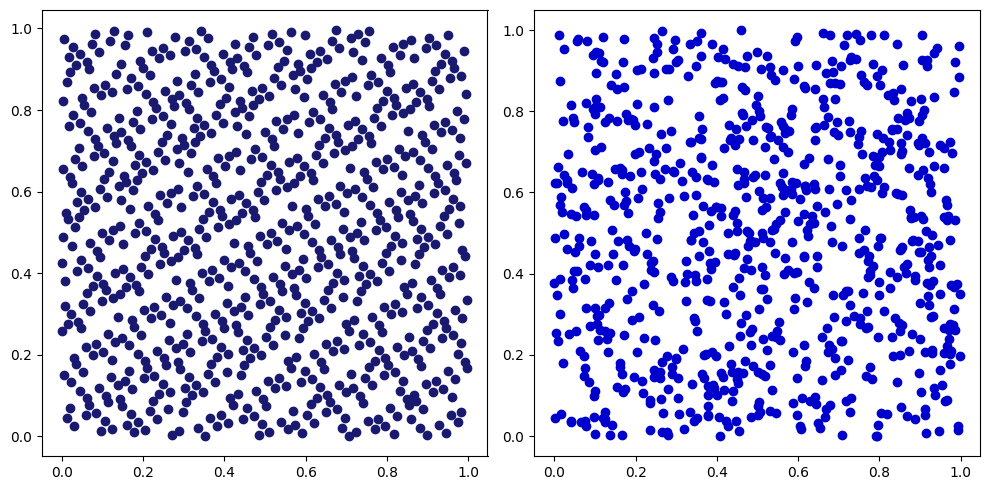

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(x_1, y_1, color=color_1, marker="o")
axes[1].scatter(x_2, y_2, color=color_2, marker="o")
plt.tight_layout()
plt.show()

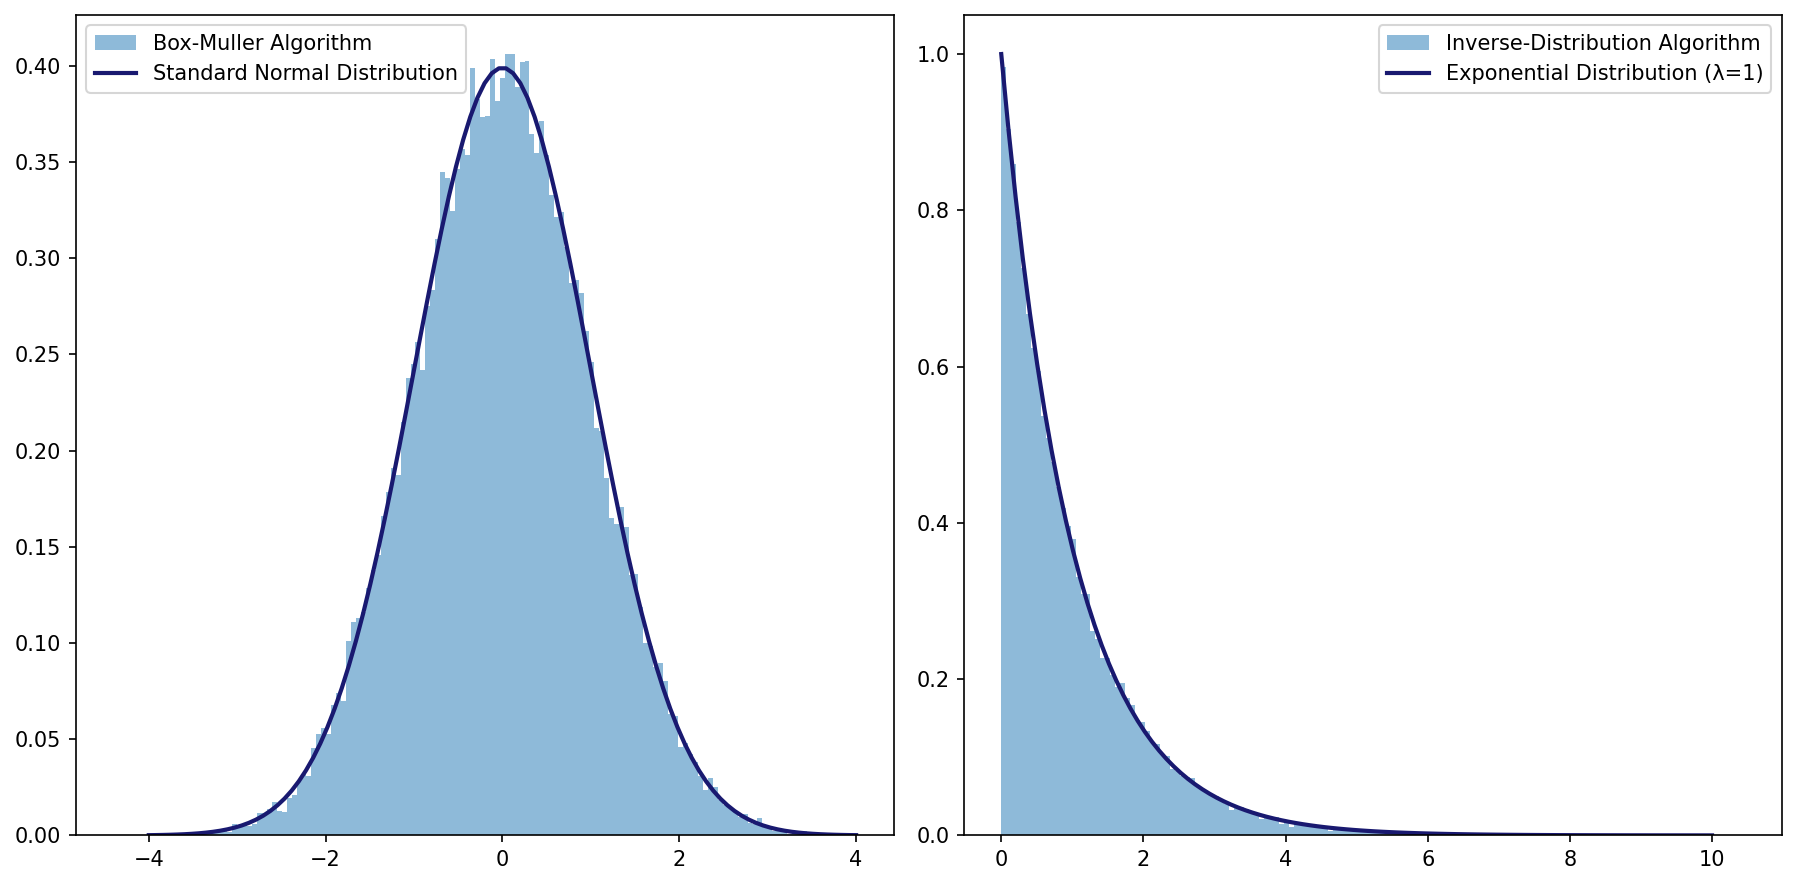

In [31]:
np.random.seed(42)
normal = NormalBoxMuller(0, 1).generate_sim(50000)
exp = ExponentialInverseDistribution(1).generate_sim(50000)
pois = PoissonSecondAlgo(1).generate_sim(50000)

plt.figure(figsize=(18, 6), dpi=150)
plt.subplot(1, 3, 1)
plt.hist(normal, bins=150, density=True, alpha=0.5, label="Box-Muller Algorithm")
x = np.linspace(-4, 4, 100)
plt.plot(
    x,
    norm.pdf(x, loc=0, scale=1),
    color=color_1,
    lw=2,
    label="Standard Normal Distribution",
)
plt.legend()
plt.subplot(1, 3, 2)
plt.hist(exp, bins=150, density=True, alpha=0.5, label="Inverse-Distribution Algorithm")
x = np.linspace(0, 10, 100)
plt.plot(
    x,
    expon.pdf(x, scale=1),
    color=color_1,
    lw=2,
    label="Exponential Distribution (λ=1)",
)
plt.legend()
plt.tight_layout()
plt.show()